In [53]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [54]:
#https://datahub.io/five-thirty-eight/weather-check  -- source
weather = pd.read_csv('weather-check_csv.csv')
weather

,respondentid,do you typically check a daily weather report?,how do you typically check the weather?,a specific website or app (please provide the answer),"if you had a smartwatch (like the soon to be released apple watch), how likely or unlikely would you be to check the weather on that device?",age,what is your gender?,how much total combined money did all members of your household earn last year?,us region
0,3887201482,yes,the default weather app on your phone,-,very likely,30 - 44,male,"$50,000 to $74,999",south atlantic
1,3887159451,yes,the default weather app on your phone,-,very likely,18 - 29,male,prefer not to answer,-
2,3887152228,yes,the default weather app on your phone,-,very likely,30 - 44,male,"$100,000 to $124,999",middle atlantic
3,3887145426,yes,the default weather app on your phone,-,somewhat likely,30 - 44,male,prefer not to answer,-
4,3887021873,yes,a specific website or app (please provide the ...,iphone app,very likely,30 - 44,male,"$150,000 to $174,999",middle atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,yes,the weather channel,-,very likely,45 - 59,female,prefer not to answer,pacific
924,3877568053,yes,the default weather app on your phone,-,very likely,30 - 44,female,prefer not to answer,south atlantic
925,3877566926,yes,local tv news,-,somewhat likely,60+,female,prefer not to answer,pacific
926,3877551536,no,-,-,-,-,-,-,-


In [55]:
#rename the columns
rename_columns = {
    "respondentid": "ID",
    "do you typically check a daily weather report?": "Check",
    "how do you typically check the weather?": "How",
    "a specific website or app (please provide the answer)": "Source",
    "if you had a smartwatch (like the soon to be released apple watch), how likely or unlikely would you be to check the weather on that device?": "SmartWatch",
    "what is your gender?": "Gender",
    "how much total combined money did all members of your household earn last year?": "Income", 
    "us region": "Region"
}

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
weather.rename(columns=rename_columns, inplace=True)  #rename the columns using the RENAME METHOD

#display the result -
weather


,ID,Check,How,Source,SmartWatch,age,Gender,Income,Region
0,3887201482,yes,the default weather app on your phone,-,very likely,30 - 44,male,"$50,000 to $74,999",south atlantic
1,3887159451,yes,the default weather app on your phone,-,very likely,18 - 29,male,prefer not to answer,-
2,3887152228,yes,the default weather app on your phone,-,very likely,30 - 44,male,"$100,000 to $124,999",middle atlantic
3,3887145426,yes,the default weather app on your phone,-,somewhat likely,30 - 44,male,prefer not to answer,-
4,3887021873,yes,a specific website or app (please provide the ...,iphone app,very likely,30 - 44,male,"$150,000 to $174,999",middle atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,yes,the weather channel,-,very likely,45 - 59,female,prefer not to answer,pacific
924,3877568053,yes,the default weather app on your phone,-,very likely,30 - 44,female,prefer not to answer,south atlantic
925,3877566926,yes,local tv news,-,somewhat likely,60+,female,prefer not to answer,pacific
926,3877551536,no,-,-,-,-,-,-,-


In [56]:
#validate and unique the age data
weather['age'].unique()


array(['30 - 44', '18 - 29', '-', '45 - 59', '60+'], dtype=object)

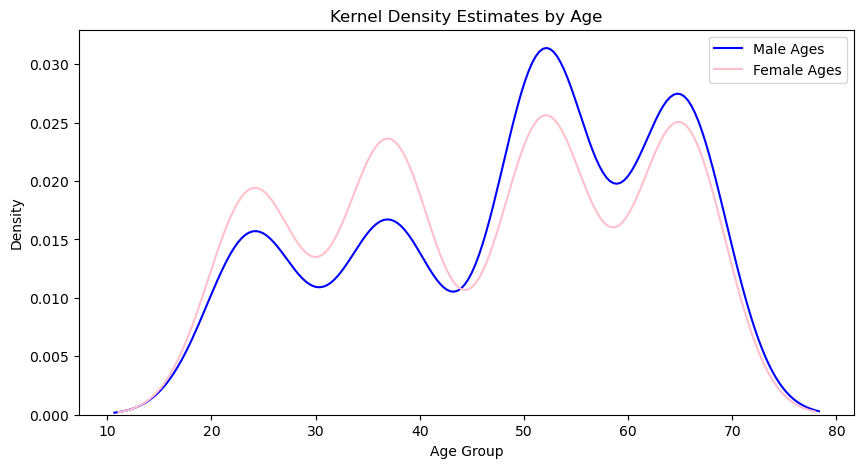

In [57]:
#create a mapping from age ranges to numeric values
age_mapping = {
    '18 - 29': 24,    # Midpoint of '18 - 29'
    '30 - 44': 37,    # Midpoint of '30 - 44'
    '45 - 59': 52,    # Midpoint of '45 - 59'
    '60+': 65         # Midpoint of '60+'
}

#apply the mapping to the 'age' column
weather['age'] = weather['age'].map(age_mapping)

#create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

#plot the KDE for male ages in blue with a label
sns.kdeplot(data=weather[weather['Gender'] == 'male']['age'], ax=ax, color='blue', label='Male Ages')

#plot the KDE for female ages in pink with a label
sns.kdeplot(data=weather[weather['Gender'] == 'female']['age'], ax=ax, color='pink', label='Female Ages')

#set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Density')
ax.set_title('Kernel Density Estimates by Age')

#add a legend
ax.legend()

#show the plot
plt.show()


